In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
step = 0.2
Nx = 50
L = Nx*step
num_of_ghosts = 2
half = 20
sep = half*step

In [4]:
def f(x):
    y = x+0.4
    return np.exp(-0.1*y**2)*y
def g(x):
    return f(x)+np.random.rand(x.shape[0])*0.4-0.2
def h(x):
    return (1.4+np.sin(2*np.pi*x/L))*0.4

In [5]:
x = np.arange(0, L+2*num_of_ghosts*step, step)-num_of_ghosts*step
y = f(x)
z = g(x)
u = h(x)

In [6]:
from scipy.ndimage import gaussian_filter
t = gaussian_filter(z, sigma=2)

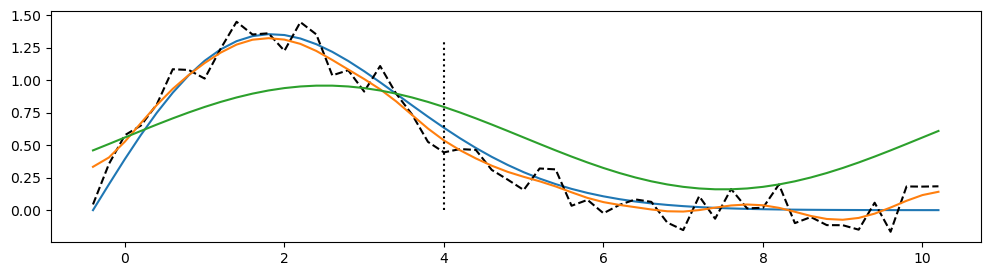

In [7]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(x, y)
plt.plot(x, z, 'k--')
plt.plot(x, t)
plt.plot(x, u)
plt.plot([sep, sep], [0, 1.3], 'k:')

In [8]:
x1 = x[:half+2*num_of_ghosts]
x2 = x[half:]
y1 = z[:half+2*num_of_ghosts]
y2 = z[half:]
u1 = u[:half+2*num_of_ghosts]
u2 = u[half:]

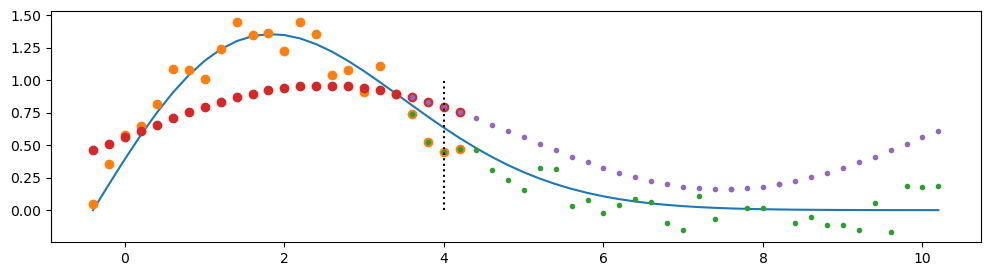

In [9]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(x, y)
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, '.')
plt.plot(x1, u1, 'o')
plt.plot(x2, u2, '.')
plt.plot([sep, sep], [0, 1], 'k:')

In [10]:
def _disables_array_ufunc(obj):
    try:
        return obj.__array_ufunc__ is None
    except AttributeError:
        return False

In [11]:
class Patch():
    def __init__(self, data, idx, num_of_ghosts=2):
        assert(data.shape == idx.shape)
        self.data = np.array(data)
        self.nx = self.data.shape[0]
        self.idx = np.array(idx)
        self.num_of_ghosts = num_of_ghosts
    def __add__(self, other):
        if _disables_array_ufunc(other):
            return NotImplemented
        assert(self.data.shape == other.data.shape)
        return Patch(np.add(self.data, other.data), self.idx, self.num_of_ghosts)
    def __mul__(self, other):
        if _disables_array_ufunc(other):
            return NotImplemented
        return np.multiply(self, other)
    def __array_ufunc__(self, ufunc, method, *args, **kwargs):
        # data = self.data
        data = np.ones(self.data.shape)*0.2
        return Patch(self.data, self.idx, self.num_of_ghosts)
    def __array_function__(self, func, types, args, kwargs):
        # data = self.data
        data = np.ones(self.data.shape)*0.1
        return Patch(data, self.idx, self.num_of_ghosts)
    def __repr__(self):
        return """
        data : {0}
        idx  : {1}
        nx   = {2}""".format(self.data, self.idx, self.nx)

In [12]:
py1 = Patch(y1, x1)
py2 = Patch(y2, x2)
pu1 = Patch(u1, x1)
pu2 = Patch(u2, x2)

In [13]:
ps1 = py1+pu1
ps2 = py2+pu2

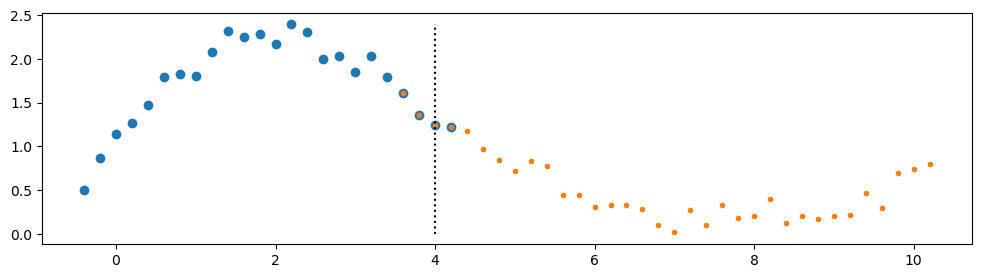

In [14]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(ps1.idx, ps1.data, 'o')
plt.plot(ps2.idx, ps2.data, '.')
plt.plot([sep, sep], [0, 2.4], 'k:')

In [15]:
from scipy.ndimage import gaussian_filter

# gaussian_filter(py1, sigma=2)
np.exp(py1)


        data : [0.04412835 0.35624536 0.57767594 0.65183168 0.81486665 1.08556074
 1.08012009 1.01370439 1.24345195 1.45124292 1.3532265  1.36249752
 1.22774895 1.44858801 1.35393241 1.03856692 1.07800189 0.9137145
 1.11034851 0.89835148 0.73701132 0.52594949 0.44516401 0.47051087]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24

In [16]:
import numpy as np
a = np.array([1])
shape = (2, 2)
a.__array_function__(func=np.broadcast_to, types=(np.ndarray,), args=(a, shape), kwargs={})

array([[1, 1],
       [1, 1]])

In [17]:
np.broadcast_to(a, shape)

array([[1, 1],
       [1, 1]])

In [18]:
class Hierarchy():
    def __init__(self, patches):
        self.patches = patches
    def __repr__(self):
        return """
        p1 : {0}
        p2 : {1}
        """.format(self.patches[0], self.patches[1])

In [19]:
hy = Hierarchy([py1, py2])

In [20]:
print(hy)


        p1 : 
        data : [0.04412835 0.35624536 0.57767594 0.65183168 0.81486665 1.08556074
 1.08012009 1.01370439 1.24345195 1.45124292 1.3532265  1.36249752
 1.22774895 1.44858801 1.35393241 1.03856692 1.07800189 0.9137145
 1.11034851 0.89835148 0.73701132 0.52594949 0.44516401 0.47051087]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
        p2 : 
        data : [ 0.73701132  0.52594949  0.44516401  0.47051087  0.46418061  0.30977848
  0.23498757  0.15547167  0.32106225  0.31407775  0.03391621  0.07915524
 -0.0237552   0.04043484  0.08278964  0.06386835 -0.09555392 -0.1536585
  0.10765666 -0.06598574  0.16276168  0.01398863  0.01828417  0.1980083
 -0.09986778 -0.05305786 -0.11520557 -0.11595435 -0.15028008  0.05731176
 -0.16655966  0.18250693  0.18146222  0.18366313]
        idx  : [ 3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2
  6.4  6.6  6.8  7

In [21]:
q = gaussian_filter(hy, sigma=3)

In [22]:
print(hy, q)


        p1 : 
        data : [0.04412835 0.35624536 0.57767594 0.65183168 0.81486665 1.08556074
 1.08012009 1.01370439 1.24345195 1.45124292 1.3532265  1.36249752
 1.22774895 1.44858801 1.35393241 1.03856692 1.07800189 0.9137145
 1.11034851 0.89835148 0.73701132 0.52594949 0.44516401 0.47051087]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
        p2 : 
        data : [ 0.73701132  0.52594949  0.44516401  0.47051087  0.46418061  0.30977848
  0.23498757  0.15547167  0.32106225  0.31407775  0.03391621  0.07915524
 -0.0237552   0.04043484  0.08278964  0.06386835 -0.09555392 -0.1536585
  0.10765666 -0.06598574  0.16276168  0.01398863  0.01828417  0.1980083
 -0.09986778 -0.05305786 -0.11520557 -0.11595435 -0.15028008  0.05731176
 -0.16655966  0.18250693  0.18146222  0.18366313]
        idx  : [ 3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2
  6.4  6.6  6.8  7